# DEFINE GOOGLE COLAB FLAG!

In [1]:
isGoogleColab = False

In [2]:
if isGoogleColab:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    path_to_drive = "/content/drive/My Drive/Colab Notebooks/"
else:
    path_to_drive = "./"

In [3]:
import sys; print('Python:',sys.version)
import torch; print('Pytorch:',torch.__version__)
import fastai; print('Fastai:',fastai.__version__)

Python: 3.8.8 (default, Feb 24 2021, 15:54:32) [MSC v.1928 64 bit (AMD64)]
Pytorch: 1.7.1
Fastai: 2.2.7


# Load and Resize Images

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
import torch
from PIL import Image

C:\Users\bruno\miniconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


## Data

In [5]:
path = path_to_drive + 'dataset_v1_size350/' 
path_anno = path + 'gt/'
path_img = path + 'done/'

#funcao que pega a imagem de anotacoes correspondente, dado a imagem original de entrada
get_y_fn = lambda x : path_anno + '/' + f'{x.stem}_GT.png'

In [6]:
np.random.seed(2) #mesma semente para todas as vezes que executar

label_fnames = get_image_files(path_anno)
print(label_fnames[:3])
fnames = get_image_files(path_img)
print(fnames[:3])

[Path('dataset_v1_size350/gt/0_GT.png'), Path('dataset_v1_size350/gt/1004_GT.png'), Path('dataset_v1_size350/gt/1005_GT.png')]
[Path('dataset_v1_size350/done/0.jpg'), Path('dataset_v1_size350/done/1.jpg'), Path('dataset_v1_size350/done/10.jpg')]


In [7]:
sizeImage = (350,350)

In [8]:
#redimensiona todas as imagens e salva novamente
# CUIDADO PARA NAO REDIMENSIONAR AS IMAGENS ORIGINAIS ANOTADAS. SEMPRE REDIMENSIONAR UMA COPIA DELAS

for file in fnames:
    image = Image.open(file)
    print(file)
    image = image.resize(sizeImage, resample=Image.NEAREST)
    image.save(file)

for file in label_fnames:
    image = Image.open(file)
    print(file)
    image = image.resize(sizeImage, resample=Image.NEAREST)
    image.save(file)


\done\730.jpg
dataset_v1_size350\done\732.jpg
dataset_v1_size350\done\734.jpg
dataset_v1_size350\done\735.jpg
dataset_v1_size350\done\736.jpg
dataset_v1_size350\done\742.jpg
dataset_v1_size350\done\743.jpg
dataset_v1_size350\done\744.jpg
dataset_v1_size350\done\748.jpg
dataset_v1_size350\done\750.jpg
dataset_v1_size350\done\751.jpg
dataset_v1_size350\done\754.jpg
dataset_v1_size350\done\755.jpg
dataset_v1_size350\done\758.jpg
dataset_v1_size350\done\765.jpg
dataset_v1_size350\done\767.jpg
dataset_v1_size350\done\771.jpg
dataset_v1_size350\done\772.jpg
dataset_v1_size350\done\773.jpg
dataset_v1_size350\done\775.jpg
dataset_v1_size350\done\777.jpg
dataset_v1_size350\done\779.jpg
dataset_v1_size350\done\780.jpg
dataset_v1_size350\done\781.jpg
dataset_v1_size350\done\783.jpg
dataset_v1_size350\done\787.jpg
dataset_v1_size350\done\789.jpg
dataset_v1_size350\done\791.jpg
dataset_v1_size350\done\792.jpg
dataset_v1_size350\done\797.jpg
dataset_v1_size350\done\799.jpg
dataset_v1_size350\done\80

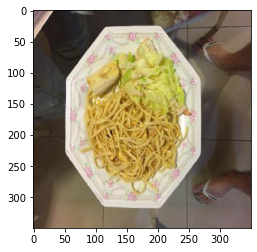

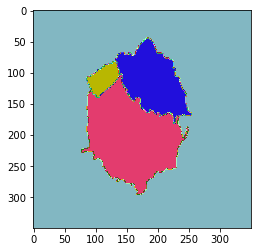

Ground truth Codes (array([ 0,  8, 31, 65], dtype=uint8), array([94159, 17677,  1738,  8926], dtype=int64))


In [12]:
### VISUALIZACAO DA MÁSCARA FICA COM A BORDA ESTRANHA, MAS ELA ESTÁ CORRETA COMO PODE SER VISTO NOS CODIGOS DO GROUND TRUTH

idx = 260
cmap = matplotlib.colors.ListedColormap (np.random.rand(256,3))

img = Image.open(fnames[idx])
arr = np.asarray(img)
plt.imshow(arr)
plt.show()

img1 = Image.open(get_y_fn(fnames[idx]))
arr = np.asarray(img1)
plt.imshow(arr, cmap=cmap, vmin=0, vmax=255)
plt.show()
print("Ground truth Codes",np.unique(arr,return_counts=True))
